# Домашняя работа

## Задание 1

In [1]:
import pandas as pd
shopping_trends = pd.read_csv("shopping_trends.csv")
shopping_trends_1 = shopping_trends.copy()
shopping_trends_1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Задание 2.1

Гипотеза 1: мужчины чаще становятся подписчиками и пользуются скидками

Рассмотрим корреляции между столбцами

In [41]:
shopping_trends_1.apply(lambda x : pd.factorize(x)[0]).corr()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,1.000000,0.001534,0.807960,-0.003120,-0.007120,0.054565,0.025651,0.019585,0.010547,0.013731,0.017532,0.768960,-0.003704,-0.002565,0.857496,0.857496,0.010004,-0.010510,0.018919
Age,0.001534,1.000000,-0.020329,0.032012,0.013889,0.002414,-0.040153,-0.012621,0.017495,-0.002924,0.002652,0.024318,0.013230,0.006619,-0.008150,-0.008150,-0.028524,0.009069,0.008191
Gender,0.807960,-0.020329,1.000000,-0.009859,-0.005206,0.034143,0.016180,0.011983,0.006721,0.014329,0.007043,0.417197,0.006372,-0.010670,0.595823,0.595823,0.009399,-0.018433,0.015580
Item Purchased,-0.003120,0.032012,-0.009859,1.000000,0.493024,-0.013448,0.022298,0.011720,0.017113,0.019270,0.011992,0.002255,-0.005411,0.005042,-0.007766,-0.007766,-0.009349,0.009739,0.001378
Category,-0.007120,0.013889,-0.005206,0.493024,1.000000,0.001864,0.001467,0.013899,0.030886,0.024792,-0.001270,-0.006116,-0.007118,0.013916,-0.015847,-0.015847,0.007320,-0.014298,-0.013978
Purchase Amount (USD),0.054565,0.002414,0.034143,-0.013448,0.001864,1.000000,-0.008413,-0.028787,0.011451,-0.022551,0.017110,0.039863,0.008824,0.005726,0.045690,0.045690,0.036293,-0.010235,0.008835
Location,0.025651,-0.040153,0.016180,0.022298,0.001467,-0.008413,1.000000,0.014324,-0.021148,0.048918,-0.003149,0.025652,0.009508,0.016207,0.009819,0.009819,-0.002620,-0.026080,0.010244
Size,0.019585,-0.012621,0.011983,0.011720,0.013899,-0.028787,0.014324,1.000000,-0.012425,-0.001056,0.005142,0.011667,0.009013,-0.008476,0.016470,0.016470,0.010503,-0.010824,-0.033008
Color,0.010547,0.017495,0.006721,0.017113,0.030886,0.011451,-0.021148,-0.012425,1.000000,0.021034,-0.012348,0.016709,-0.011899,0.037436,0.012178,0.012178,0.011973,0.016826,-0.001120
Season,0.013731,-0.002924,0.014329,0.019270,0.024792,-0.022551,0.048918,-0.001056,0.021034,1.000000,-0.007931,-0.008696,0.002800,-0.012341,0.014660,0.014660,-0.006118,-0.011918,0.001265


Как мы видим, есть связь между полом, статусом подписки, получением скидки и использованием промокода. Также похоже столбцы получение скидки и использование промокода вообще одинаковые. Посмотрим, какой пол чаще всего этим пользуется

In [11]:
shopping_trends_1.groupby(['Gender', 'Subscription Status']).size().reset_index(name='Count')

,Gender,Subscription Status,Count
0,Female,No,1248
1,Male,No,1599
2,Male,Yes,1053


In [12]:
shopping_trends_1.groupby(['Gender', 'Discount Applied']).size().reset_index(name='Count')

,Gender,Discount Applied,Count
0,Female,No,1248
1,Male,No,975
2,Male,Yes,1677


Как мы видим, среди женщин вообще нет подписчиков, в отличие от мужчин. Тоже самое со скидками - мужчины их использовали, женщины нет.

Гипотеза 2: Большая часть подписчиков пользуется скидками, в отличие от тех кто не подписан

Сгруппируем по нужным нам признакам

In [13]:
shopping_trends_1.groupby(['Subscription Status', 'Discount Applied']).size().reset_index(name='Count')

,Subscription Status,Discount Applied,Count
0,No,No,2223
1,No,Yes,624
2,Yes,Yes,1053


Как мы видим, все подписчики используют промокод, а среди тех, у кого нет подписки, промокод использует меньшая часть

Гипотеза 3: Юбок среди мужчин покупает меньшая часть, чем среди женщин.

Посчитаем количество купленных юбок у обоих полов и поделим на их общее число покупок

In [15]:
df_Skirt = shopping_trends_1[(shopping_trends['Gender'] == 'Female') & (shopping_trends_1['Item Purchased'] == 'Skirt')]
df_Skirt_1 = shopping_trends_1[shopping_trends['Gender'] == 'Female']
print(df_Skirt["Customer ID"].count()/df_Skirt_1["Customer ID"].count())

df_Skirt_2 = shopping_trends_1[(shopping_trends['Gender'] == 'Male') & (shopping_trends_1['Item Purchased'] == 'Skirt')]
df_Skirt_3 = shopping_trends_1[shopping_trends['Gender'] == 'Male']
print(df_Skirt_2["Customer ID"].count()/df_Skirt_3["Customer ID"].count())

0.03926282051282051
0.04110105580693816


Как мы видим, среди мужчин юбки популярнее, чем даже среди женщин, гипотеза опровергнута

Гипотеза 4: У молодых мужчин средняя оценка предмета выше, чем среди других групп людей

Молодыми будем считать людей от 18 до 25, стариками от 60 до 70

In [16]:
age_1 = pd.cut(shopping_trends_1["Age"], [18, 25,60, 70])
shopping_trends_1.pivot_table("Review Rating", index=["Gender"], columns=[age_1])

Age,"(18, 25]","(25, 60]","(60, 70]"
Gender,,,
Female,3.724837,3.724911,3.804386
Male,3.870487,3.734849,3.744848


Как мы видим, молодые мужчин действительно оценивают предметы лучше, чем остальные

Гипотеза 5: Зимой траты на свитер в целом больше, чем летом

In [18]:
df_Summer = shopping_trends_1[(shopping_trends_1['Item Purchased'] == 'Sweater') & (shopping_trends_1['Season'] == 'Summer')]
df_Summer["Purchase Amount (USD)"].sum()

1518

In [19]:
df_Winter = shopping_trends_1[(shopping_trends_1['Item Purchased'] == 'Sweater') & (shopping_trends_1['Season'] == 'Winter')]
df_Winter["Purchase Amount (USD)"].sum()

2365

In [ ]:
В целом, траты зимой на покупку свитера действительно больше, чем летом

Гипотеза 6: Среди женщин покупают предметы меньших размеров (S) больше, чем среди мужчин

In [20]:
df_S = shopping_trends_1[(shopping_trends_1["Size"] == 'S') & (shopping_trends_1['Gender'] == 'Male')]
df_S_1 = shopping_trends_1[shopping_trends_1['Gender'] == 'Male']
print(df_S["Customer ID"].count()/df_S_1["Customer ID"].count())

df_S_2 = shopping_trends_1[(shopping_trends_1["Size"] == 'S') & (shopping_trends_1['Gender'] == 'Female')]
df_S_3 = shopping_trends_1[shopping_trends_1['Gender'] == 'Female']
print(df_S_2["Customer ID"].count()/df_S_3["Customer ID"].count())

0.1794871794871795
0.14983974358974358


Как мы видим, гипотеза опровергнута, у мужчин предметы размером S популярнее

Гипотеза 7: Проверим, явлется ли общая сумма покупок наличкой (cash) меньше, чем другими способами, и в целом, и отдельно у мужчин и женщин

In [21]:
shopping_trends_1.pivot_table("Previous Purchases", index=["Gender"], columns=["Payment Method"],aggfunc='sum',margins=True)

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo,All
Gender,,,,,,,
Female,5122,4886,5400,5133,4885,5270,30696
Male,11414,11353,11575,10809,11387,11637,68175
All,16536,16239,16975,15942,16272,16907,98871


Как мы видим, что в целом, что и у обоих полов, пусть наличкой не тратят в сумме больше всего, но и не меньше, чем каждый из других. Гипотеза опровергнута

## Задание 2.2

Найдем самый популярный товар

In [22]:
shopping_trends_1.groupby("Item Purchased")["Item Purchased"].size().reset_index(name='Count')

,Item Purchased,Count
0,Backpack,143
1,Belt,161
2,Blouse,171
3,Boots,144
4,Coat,161
5,Dress,166
6,Gloves,140
7,Handbag,153
8,Hat,154
9,Hoodie,151


Как мы видим, их несколько - блузка, ювелирное изделие, штаны

Распределение покупателей по полу

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

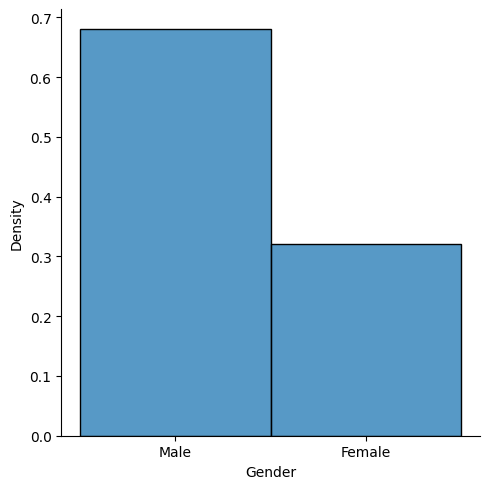

In [26]:
data = shopping_trends_1['Gender']

sns.displot(data, stat = 'density')

plt.show()

Определим какой пол покупает: 1 - больше всего

In [27]:
shopping_trends_1.groupby("Gender")["Previous Purchases"].mean()

Gender
Female    24.596154
Male      25.707014
Name: Previous Purchases, dtype: float64

Мужчины покупают больше, чем женщины

2 - чаще всего

In [28]:
shopping_trends_1.groupby(["Gender", "Frequency of Purchases"]). size().nlargest(14).reset_index(name='Count')

,Gender,Frequency of Purchases,Count
0,Male,Every 3 Months,398
1,Male,Quarterly,394
2,Male,Annually,387
3,Male,Fortnightly,379
4,Male,Monthly,368
5,Male,Weekly,367
6,Male,Bi-Weekly,359
7,Female,Bi-Weekly,188
8,Female,Every 3 Months,186
9,Female,Annually,185


Как мы видим, женщины в целов чаще покупают, распространены как частые, так и редкие покупки, тогда как у мужчин распространёнее более редкие покупки

3 - самые дорогие товары

Узнаем, какова максимальная цена на товары

In [29]:
shopping_trends.groupby(["Item Purchased"])["Purchase Amount (USD)"].max()

Item Purchased
Backpack       99
Belt          100
Blouse        100
Boots         100
Coat          100
Dress         100
Gloves         99
Handbag       100
Hat            98
Hoodie        100
Jacket        100
Jeans          99
Jewelry       100
Pants          99
Sandals       100
Scarf          99
Shirt          99
Shoes          99
Shorts        100
Skirt         100
Sneakers      100
Socks         100
Sunglasses    100
Sweater       100
T-shirt       100
Name: Purchase Amount (USD), dtype: int64

Найдём, у кого популярнее товары по такой цене

In [32]:
df_price = shopping_trends_1[(shopping_trends_1["Purchase Amount (USD)"] == 100) & (shopping_trends_1['Gender'] == 'Male')]
df_price_1 = shopping_trends_1[shopping_trends_1['Gender'] == 'Male']
print(df_price["Customer ID"].count()/df_price_1["Customer ID"].count())

df_price_2 = shopping_trends_1[(shopping_trends_1["Purchase Amount (USD)"] == 100) & (shopping_trends_1['Gender'] == 'Female')]
df_price_3 = shopping_trends_1[shopping_trends_1['Gender'] == 'Female']
print(df_price_2["Customer ID"].count()/df_price_3["Customer ID"].count())

0.00942684766214178
0.008814102564102564


Мужчины более склонны покупать самые дорогие товары

Теперь определим какой возраст покупает: 1 - больше всего

In [33]:
shopping_trends_1.groupby("Age")["Previous Purchases"].mean()

Age
18    21.028986
19    24.481481
20    23.258065
21    23.913043
22    26.636364
23    25.070423
24    25.132353
25    26.976471
26    23.869565
27    25.036145
28    24.316456
29    25.921053
30    26.323944
31    24.278481
32    25.573171
33    22.666667
34    24.720588
35    24.486111
36    25.594595
37    25.805195
38    25.014286
39    23.867647
40    27.694444
41    24.976744
42    28.100000
43    22.962025
44    26.470588
45    21.388889
46    24.605263
47    22.309859
48    24.235294
49    26.630952
50    23.759036
51    26.402778
52    28.767123
53    26.142857
54    24.843373
55    26.534247
56    27.013514
57    28.666667
58    25.592593
59    24.520000
60    26.153846
61    26.815385
62    25.240964
63    23.840000
64    26.630137
65    27.583333
66    26.718310
67    26.500000
68    26.720000
69    26.227273
70    24.507463
Name: Previous Purchases, dtype: float64

Как мы видим, больше всего покупают 52-летние люди

2 - чаще всего

Будем считать, что чаще всего - это только те, кто покупает 'Weekly'

In [35]:
df_Weekly = shopping_trends_1[shopping_trends_1['Frequency of Purchases'] == 'Weekly']
df_Weekly.groupby("Age")["Age"].size().reset_index(name='Count')

,Age,Count
0,18,9
1,19,6
2,20,8
3,21,8
4,22,8
5,23,11
6,24,10
7,25,11
8,26,5
9,27,12


В таких условиях, чаще всего покупают люди возрастом 32 и 42 года

3 - самые дорогие товары

In [38]:
df_USD = shopping_trends_1[shopping_trends_1['Purchase Amount (USD)'] == 100]
df_USD.groupby("Age")["Age"].size().reset_index(name='Count')

,Age,Count
0,18,2
1,20,3
2,22,1
3,24,2
4,25,2
5,28,1
6,30,1
7,32,2
8,33,1
9,34,1


Самые дорогие товары распространённее у 20-летних

Определим есть ли зависимость между цветом одежды и сезоном

Из таблицы нужно убрать аксессуары, т.к. они одеждой не считаются

In [40]:
df_ratio = shopping_trends_1[(shopping_trends_1["Category"] == 'Outerwear') | (shopping_trends_1['Category'] == 'Clothing')| (shopping_trends_1['Category'] == 'Footwear')]
df_ratio.apply(lambda x : pd.factorize(x)[0]).corr()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,1.000000,0.015183,0.809160,0.007670,-0.011916,0.064419,0.032133,0.018490,0.030370,0.012639,0.005936,0.769230,-0.007797,0.009887,0.856570,0.856570,0.043809,-0.006467,0.014390
Age,0.015183,1.000000,-0.010785,0.019897,0.002796,0.009369,-0.025279,-0.009136,0.000563,-0.009188,0.001285,0.044797,0.004608,-0.004463,0.009359,0.009359,-0.029029,0.010714,0.020916
Gender,0.809160,-0.010785,1.000000,0.005864,-0.000333,0.031879,0.023829,0.015817,0.010025,0.010152,-0.011505,0.419247,0.002912,0.006132,0.593811,0.593811,0.037531,-0.013050,0.016837
Item Purchased,0.007670,0.019897,0.005864,1.000000,0.086688,0.001025,0.026021,-0.004517,0.012191,0.008456,0.001211,0.004044,0.007280,0.005873,0.005132,0.005132,0.013635,0.018436,0.015875
Category,-0.011916,0.002796,-0.000333,0.086688,1.000000,-0.000352,-0.000963,-0.017328,0.017978,0.016992,-0.001421,-0.019218,0.040935,-0.019171,-0.016662,-0.016662,0.009120,-0.012014,-0.034787
Purchase Amount (USD),0.064419,0.009369,0.031879,0.001025,-0.000352,1.000000,-0.012200,-0.029155,0.008743,-0.020755,0.041782,0.040576,-0.006565,-0.002250,0.059986,0.059986,0.053885,-0.013408,0.008122
Location,0.032133,-0.025279,0.023829,0.026021,-0.000963,-0.012200,1.000000,0.017529,-0.033116,0.072994,0.011284,0.032281,0.020922,0.014141,0.006439,0.006439,-0.004874,0.003305,0.012970
Size,0.018490,-0.009136,0.015817,-0.004517,-0.017328,-0.029155,0.017529,1.000000,-0.018378,0.001301,-0.014352,0.003797,0.004479,0.011660,0.014434,0.014434,-0.007651,-0.012697,-0.044513
Color,0.030370,0.000563,0.010025,0.012191,0.017978,0.008743,-0.033116,-0.018378,1.000000,0.002874,-0.005792,0.037800,0.009165,0.026097,0.031059,0.031059,0.010084,0.012279,0.003510
Season,0.012639,-0.009188,0.010152,0.008456,0.016992,-0.020755,0.072994,0.001301,0.002874,1.000000,-0.000589,-0.009745,0.009427,-0.002268,0.014605,0.014605,0.017107,-0.005538,0.008114


Как мы видим, у столбцов сезона и цвета зависимости серьёзной нет

Посчитаем сезонный mau (уникальных пользователей за сезон) и его динамику

In [42]:
shopping_trends_1.groupby("Season")["Season"].size().reset_index(name='Count')

,Season,Count
0,Fall,975
1,Spring,999
2,Summer,955
3,Winter,971


Как мы видим, меньше всего покупателей летом, далее осенью и зимой показатель выше и примерно на одном уровне, далее весной - максимальное значение

Самая популярная буква в названии одежды

Сначала сложим все названия в строку, а потом есть 2 варианта - либо использовать импортированный класс Counter, либо делать циклом, но т.к. рекомендуется в Python избегать больших циклов, сделаем первым вариантом

In [44]:
from collections import Counter

In [45]:
df_letter = shopping_trends_1[(shopping_trends_1["Category"] == 'Outerwear') | (shopping_trends_1['Category'] == 'Clothing')| (shopping_trends_1['Category'] == 'Footwear')]
c = Counter(df_letter['Item Purchased'].str.cat())
print(c.most_common(1)[0][0])

s


## Задание 3

In [47]:
drinks = pd.read_csv("drinks.csv")
drinks_1 = drinks.copy()
drinks_1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


Найдём страны, где больше всего пьют вина, пива, спирта и суммарно литров чистого спирта

In [48]:
print(drinks_1[drinks_1["wine_servings"] == drinks_1["wine_servings"].max()]["country"])
print(drinks_1[drinks_1["beer_servings"] == drinks_1["beer_servings"].max()]["country"])
print(drinks_1[drinks_1["spirit_servings"] == drinks_1["spirit_servings"].max()]["country"])
print(drinks_1[drinks_1["total_litres_of_pure_alcohol"] == drinks_1["total_litres_of_pure_alcohol"].max()]["country"])

61    France
Name: country, dtype: object
117    Namibia
Name: country, dtype: object
68    Grenada
Name: country, dtype: object
15    Belarus
Name: country, dtype: object


## Задание 4

In [66]:
tarantino = pd.read_csv("tarantino.csv")
tarantino_1 = tarantino.copy()
tarantino_1.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


Определяем число проклятий и летальных исходов

In [69]:
tarantino_1.groupby("type"). size().reset_index(name='count')

,type,count
0,death,190
1,word,1704


Определяем отношение проклятий к летальным исходам по фильмам

In [68]:
tarantino_1.groupby('movie').apply ( lambda x: x['word']. count () / x['word'].isnull().sum()).reset_index(name='ratio')

,movie,ratio
0,Django Unchained,5.574468
1,Inglorious Basterds,1.208333
2,Jackie Brown,92.000000
3,Kill Bill: Vol. 1,0.904762
4,Kill Bill: Vol. 2,6.272727
5,Pulp Fiction,67.000000
6,Reservoir Dogs,42.100000


Определяем частоту употребления конкретных проклятий

In [52]:
tarantino_1.groupby("word")["word"].size().reset_index(name='count')

,word,count
0,ass,140
1,asses,4
2,asshead,1
3,asshole,10
4,assholes,5
5,bastard,10
6,bastards,1
7,bitch,64
8,bitches,9
9,bullshit,15


Построим распределение времени между проклятиями

Для этого нам нужно получить сами данные о разнице во времени между проклятиями. Чтобы их получить сначала отсеем данные, означающие смерть героев

In [60]:
df_word = tarantino_1[(tarantino_1["type"] == 'word')]
print(df_word)

               movie  type          word  minutes_in
0     Reservoir Dogs  word          dick        0.40
1     Reservoir Dogs  word         dicks        0.43
2     Reservoir Dogs  word        fucked        0.55
3     Reservoir Dogs  word       fucking        0.61
4     Reservoir Dogs  word      bullshit        0.61
...              ...   ...           ...         ...
1888    Jackie Brown  word  motherfucker      141.80
1889    Jackie Brown  word  motherfucker      141.93
1890    Jackie Brown  word           ass      142.43
1891    Jackie Brown  word       fucking      142.47
1892    Jackie Brown  word       goddamn      142.97

[1704 rows x 4 columns]


Обновим индексы в новом датасете

In [61]:
df_word = df_word.reset_index()

print(df_word)

      index           movie  type          word  minutes_in
0         0  Reservoir Dogs  word          dick        0.40
1         1  Reservoir Dogs  word         dicks        0.43
2         2  Reservoir Dogs  word        fucked        0.55
3         3  Reservoir Dogs  word       fucking        0.61
4         4  Reservoir Dogs  word      bullshit        0.61
...     ...             ...   ...           ...         ...
1699   1888    Jackie Brown  word  motherfucker      141.80
1700   1889    Jackie Brown  word  motherfucker      141.93
1701   1890    Jackie Brown  word           ass      142.43
1702   1891    Jackie Brown  word       fucking      142.47
1703   1892    Jackie Brown  word       goddamn      142.97

[1704 rows x 5 columns]


Далее все разницы между проклятиями запишем в отдельную Series

In [62]:
difference = pd.Series([])
count = 1703
i=0
while count > 0:
    if df_word['minutes_in'][count] - df_word['minutes_in'][count-1]>0:
        difference[i]= df_word['minutes_in'][count] - df_word['minutes_in'][count-1]
        i+=1
    count -= 1
print(difference)

0       0.50
1       0.04
2       0.50
3       0.13
4       0.25
        ... 
1605    0.24
1606    0.05
1607    0.06
1608    0.12
1609    0.03
Length: 1610, dtype: float64


Теперь уже можно построить распределение

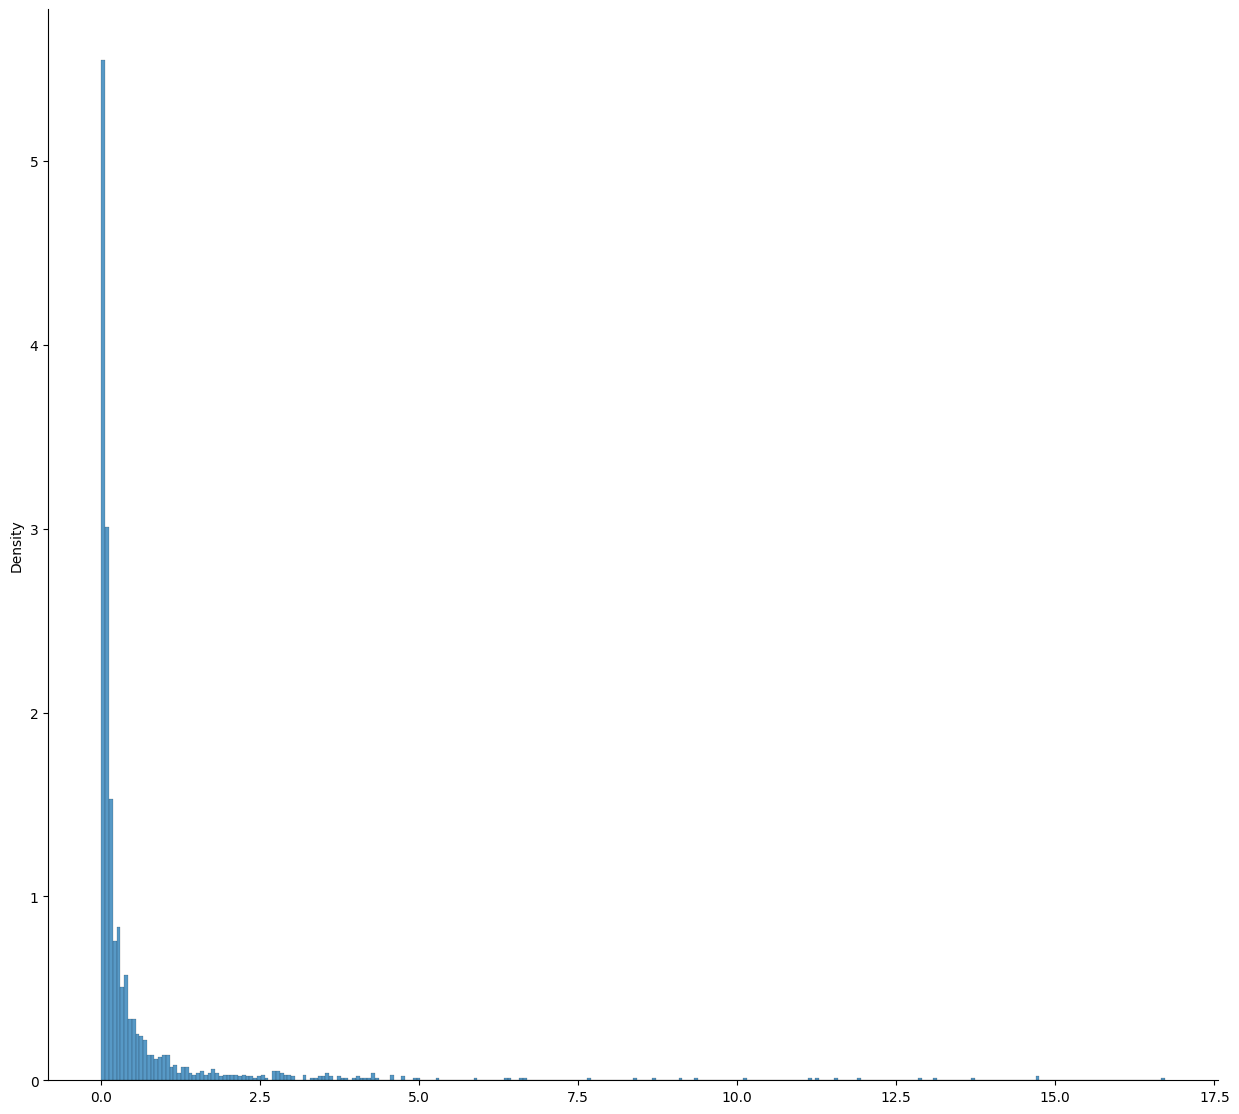

In [67]:
difference_1=sns.displot(difference, stat = 'density')
difference_1.figure.set_figwidth(14)
difference_1.figure.set_figheight(12)
plt.show()

Как мы видим, большая часть разниц во времени между проклятиями небольшая, большие перерывы между ними - явление редкое